# Regresja logistyczna
## 3-projekt-ml

## Import danych

In [1]:
# Import bibliotek (pandas – tabelki)
import pandas as pd

In [2]:
# Import danych – label encoded
df_le = pd.read_csv('../../datasets_preprocessed/label_encoded_df.zip')

# Import danych – one hot encoded
df_ohe = pd.read_csv('../../datasets_preprocessed/dummiefied_df.zip')

In [3]:
# Podgląd próbki dla `df_le`
df_le.sample(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1212,0,2,3,9,1,0,1,0,0,5,...,2,3,7,7,2,1,4,2,5,1
86,0,0,2,8,1,0,1,0,0,10,...,2,2,7,7,2,1,4,2,3,1
7586,0,0,2,3,0,5,1,1,0,10,...,1,2,7,7,2,2,4,7,3,1
7889,1,3,2,2,0,7,1,0,1,0,...,1,1,6,7,2,1,0,7,4,2
390,0,0,2,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
3028,0,2,0,2,1,5,1,0,0,7,...,2,2,7,6,2,1,4,3,5,0
2033,0,2,3,4,1,5,1,0,0,7,...,2,2,3,3,2,1,4,2,5,0
8063,0,3,0,8,0,5,1,1,0,10,...,1,2,7,7,2,2,4,7,3,1
416,0,5,0,8,1,3,1,1,1,7,...,2,2,7,7,2,1,4,6,4,0
6710,1,2,2,2,0,8,1,0,1,0,...,1,1,6,6,2,1,0,7,4,2


In [4]:
# Podgląd próbki dla `df_ohe`
df_ohe.sample(10)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
6363,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
7763,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5197,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5535,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2311,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
735,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6819,0,1,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
798,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
5204,0,1,0,0,1,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
7579,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


## Wizualizacja podstawowych danych

In [5]:
# Import biblioteki do wizualizacji
import seaborn as sns

In [6]:
# Podgląd rozkładu kolumny `class` (jadalny czy trujący)
sns.set_style('whitegrid')
sns.countplot(x='class', data=df_le, palette='RdBu_r')

<AxesSubplot:xlabel='class', ylabel='count'>

#### Otrzymuję zbalansowany zbiór, jest to dobry znak – praca może być łatwiejsza.

### Model regresji logistycznej

In [7]:
# Import biblioteki do automatycznego podziału danych na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

In [8]:
# Podział na zbiór trenigowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    df_ohe.drop(['class_e', 'class_p'], axis=1),
    df_ohe['class_p'],
    test_size=0.25,
    random_state=1337
)

In [9]:
# Import biblioteki do modelu regresji logistycznej
from sklearn.linear_model import LogisticRegression

In [10]:
# Trening modelu (liblinear nie ma znaczenia dla wyniku, a dla domyślnego zaobserwowałem pewne bugi)
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [11]:
# Predykcja
predictions = logmodel.predict(X_test)

In [12]:
# Import biblioteki do ewaluacji modelu
from sklearn import metrics

In [13]:
# Ewaluacja modelu
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1042
           1       1.00      1.00      1.00       989

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [14]:
from sklearn import metrics

# Metryka confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix

array([[1042,    0],
       [   0,  989]], dtype=int64)

In [15]:
# Metryki
print("Accuracy:", metrics.accuracy_score(y_test, predictions))
print("Precision:", metrics.precision_score(y_test, predictions))
print("Recall:", metrics.recall_score(y_test, predictions))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


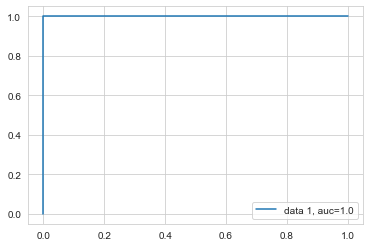

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Metryka krzywej ROC
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Predykcja w aplikacji klienckiej

In [17]:
def predict_for_user_input (mushroom_data):
    local_df = pd.DataFrame(columns=X_test.columns)
    local_df = local_df.append(mushroom_data, ignore_index=True)
    
    # Fill N/a
    local_df.fillna(1, inplace=True)
    
    return logmodel.predict(local_df)

In [18]:
predict_for_user_input({ 'cap-shape_k': 0 })

array([1], dtype=int64)

#### Dla niewystarczających danych aplikacja wykazuje skłonność do dawania false - positivów. To dobrze!
##### W tym przypadku lepsze są false positive niż false negative :)

#### Testy funkcji

In [19]:
import numpy as np

# Weźmy sobie 10 rekordów
test_sample = X_test.iloc[:10]

In [20]:
test_sample_y_prod = predict_for_user_input(test_sample)
test_sample_y_prod

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [21]:
# Pierwszy rekord ma wynik true, weźmy sobie ten row i odwróćmy wartości, żeby sprawdzić efekt
predict_for_user_input(test_sample.apply(lambda x: np.invert(x)))

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

### Ok, testy wypadają książkowo – czy jest za dobrze?

### Dodatkowe metryki - feature importance

In [22]:
# Wyciągnięcie feature importance
importance = logmodel.coef_[0]

# Podsumowanie feature importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.33379
Feature: 1, Score: 0.51627
Feature: 2, Score: 0.00912
Feature: 3, Score: -0.12122
Feature: 4, Score: -0.50987
Feature: 5, Score: -0.12575
Feature: 6, Score: -0.82168
Feature: 7, Score: 0.65112
Feature: 8, Score: 0.25364
Feature: 9, Score: 0.01925
Feature: 10, Score: 0.92634
Feature: 11, Score: -0.96077
Feature: 12, Score: 0.04723
Feature: 13, Score: 0.04821
Feature: 14, Score: -0.31266
Feature: 15, Score: 0.80047
Feature: 16, Score: -0.40455
Feature: 17, Score: -0.38149
Feature: 18, Score: 0.56915
Feature: 19, Score: -0.22959
Feature: 20, Score: -0.01960
Feature: 21, Score: 0.12193
Feature: 22, Score: -2.73438
Feature: 23, Score: 2.65017
Feature: 24, Score: 2.60895
Feature: 25, Score: -2.72277
Feature: 26, Score: 0.31695
Feature: 27, Score: -3.96838
Feature: 28, Score: 2.23799
Feature: 29, Score: 0.85698
Feature: 30, Score: 0.85681
Feature: 31, Score: -0.11718
Feature: 32, Score: 0.21951
Feature: 33, Score: 1.52593
Feature: 34, Score: -1.42360
Feature: 35, Sc

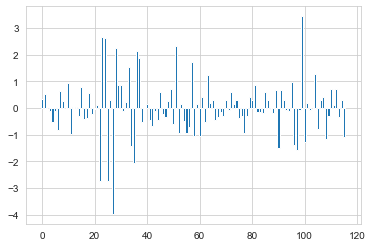

In [23]:
# Plotowanie feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

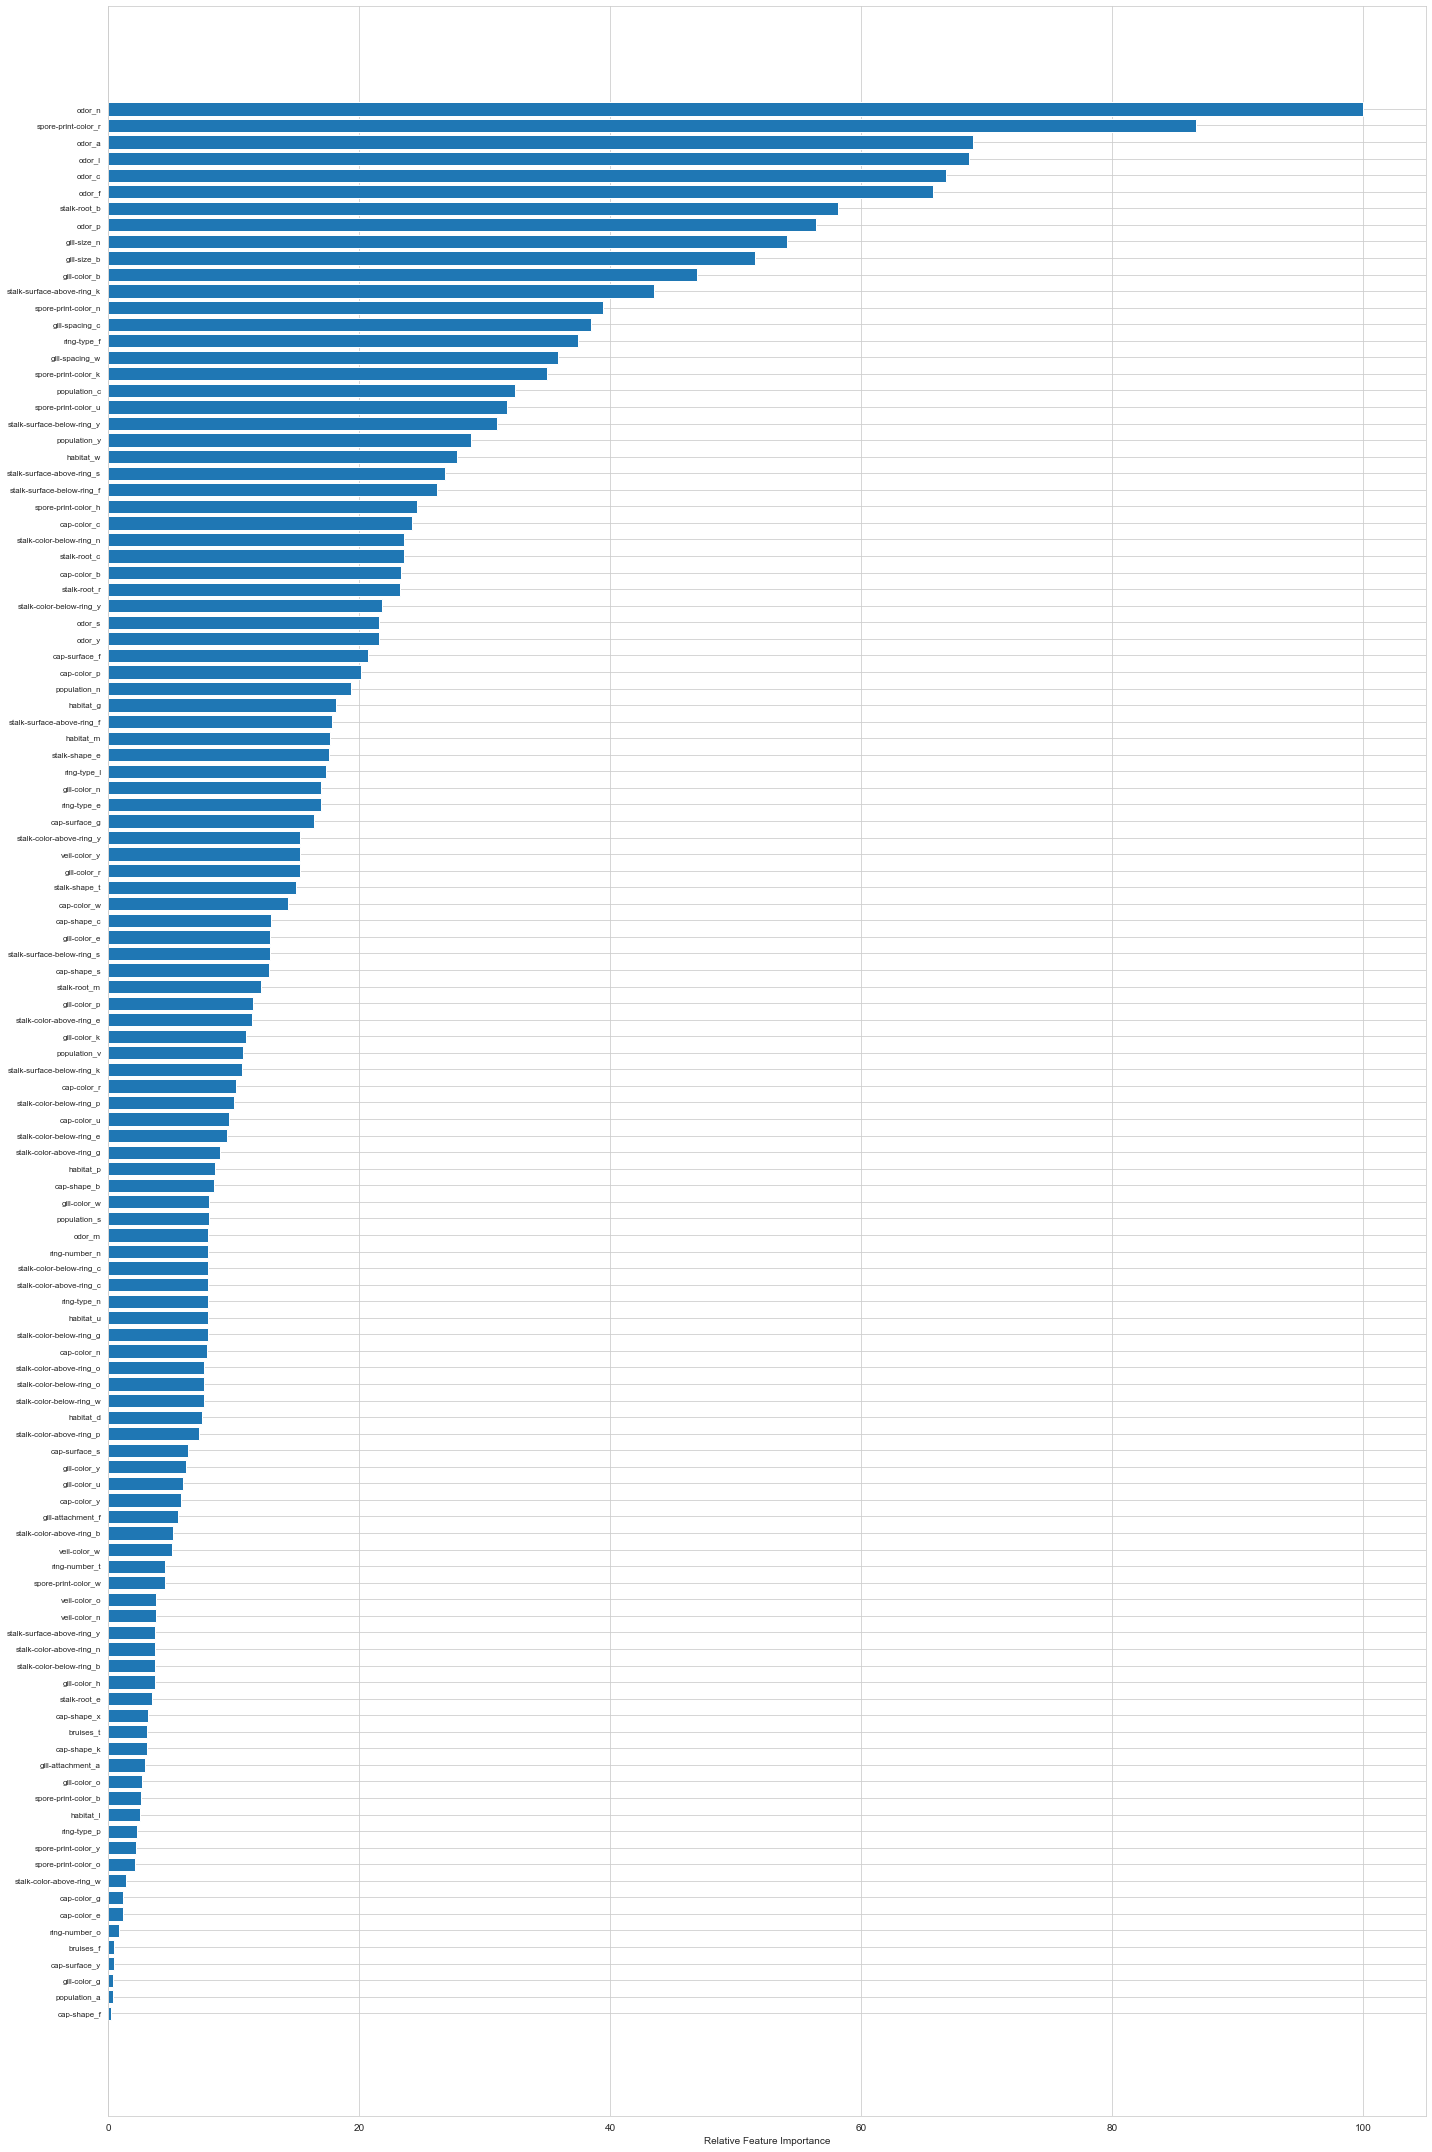

In [24]:
# Plotowanie feature importance z labelami, posortowane
feature_importance = abs(logmodel.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(20, 30))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_test.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

In [25]:
# Dlaczego `odor_n` ma największe znaczenie?
np.unique(predict_for_user_input(X_test[X_test['odor_n'] == 1]), return_counts=True)

(array([0, 1], dtype=int64), array([852,  27], dtype=int64))

In [26]:
# Grzyby bez zapachu najczęściej nie są trujące :)

# Dalsze testy
np.unique(predict_for_user_input(X_test[X_test['odor_m'] == 1]), return_counts=True)

(array([1], dtype=int64), array([13], dtype=int64))

In [27]:
np.unique(df_ohe[df_ohe['odor_n'] == 1]['class_p'], return_counts=True)

(array([0, 1], dtype=int64), array([3408,  120], dtype=int64))

### Sprawdzenie, czy ten sam kod da ~50% accuracy przy losowym Y

In [28]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    df_ohe.drop(['class_e', 'class_p'], axis=1),
    pd.Series(np.random.choice(a=[0, 1], size=8124), index=df_ohe['class_p'].index, name='class_p'),
    test_size=0.25,
    random_state=1337
)

logmodel_2 = LogisticRegression(solver='liblinear')
logmodel_2.fit(X_train_2, y_train_2)

print(metrics.classification_report(y_test_2, logmodel_2.predict(X_test_2)))

              precision    recall  f1-score   support

           0       0.50      0.45      0.47       990
           1       0.52      0.56      0.54      1041

    accuracy                           0.51      2031
   macro avg       0.51      0.51      0.51      2031
weighted avg       0.51      0.51      0.51      2031



# Podsumowanie

### Skuteczność predykcji przy podaniu wszystkich danych grzyba równa 100%.
### Zaimplementowano funkcję zdolną przyjąć do predykcji ograniczoną liczbę argumentów (domyślne wypełnienie brakujących zerem z tendencją do false-positive (to dobrze))

# Badanie skuteczności modelu przy braku danych

In [29]:
import sys

sys.path.append('../..')

In [30]:
import scoring as sc

In [31]:
test_model = sc.TestModel(logmodel, df_ohe)
test_model

In [32]:
test_model.test_for_empty_feature(8000)

Results for gill-size
Model score on 8000 samples: 0.996625


Results for stalk-root
Model score on 8000 samples: 0.996375


Results for gill-attachment
Model score on 8000 samples: 0.999875


Results for veil-color
Model score on 8000 samples: 1.0


Results for bruises
Model score on 8000 samples: 1.0


Results for cap-shape
Model score on 8000 samples: 1.0


Results for stalk-surface-above-ring
Model score on 8000 samples: 0.999125


Results for gill-color
Model score on 8000 samples: 1.0


Results for cap-color
Model score on 8000 samples: 0.99975


Results for cap-surface
Model score on 8000 samples: 1.0


Results for ring-type
Model score on 8000 samples: 1.0


Results for population
Model score on 8000 samples: 0.999125


Results for stalk-shape
Model score on 8000 samples: 0.999625


Results for stalk-surface-below-ring
Model score on 8000 samples: 1.0


Results for stalk-color-above-ring
Model score on 8000 samples: 1.0


Results for gill-spacing
Model score on 8000 samples: 0.

In [33]:
for i in range(2, 16):
    for j in range(5):
        print(f'Try {j} for {i} features.')
        test_model.test_for_missing_m_features(i, 2000)
        print('\n')

Try 0 for 2 features.
Removed features: {'stalk-shape', 'stalk-color-above-ring'}
Model score on 2000 samples: 0.9995


Try 1 for 2 features.
Removed features: {'habitat', 'stalk-color-above-ring'}
Model score on 2000 samples: 1.0


Try 2 for 2 features.
Removed features: {'stalk-surface-below-ring', 'gill-attachment'}
Model score on 2000 samples: 0.9995


Try 3 for 2 features.
Removed features: {'ring-number', 'gill-attachment'}
Model score on 2000 samples: 1.0


Try 4 for 2 features.
Removed features: {'stalk-root', 'cap-shape'}
Model score on 2000 samples: 0.996


Try 0 for 3 features.
Removed features: {'stalk-color-below-ring', 'spore-print-color', 'cap-color'}
Model score on 2000 samples: 0.9925


Try 1 for 3 features.
Removed features: {'cap-surface', 'spore-print-color', 'gill-spacing'}
Model score on 2000 samples: 0.991


Try 2 for 3 features.
Removed features: {'stalk-surface-below-ring', 'ring-type', 'stalk-color-above-ring'}
Model score on 2000 samples: 0.999


Try 3 for 3 

Model score on 2000 samples: 0.912


Try 2 for 11 features.
Removed features: {'stalk-color-below-ring', 'gill-color', 'stalk-surface-below-ring', 'stalk-root', 'cap-color', 'gill-attachment', 'ring-type', 'cap-shape', 'stalk-surface-above-ring', 'stalk-color-above-ring', 'gill-spacing'}
Model score on 2000 samples: 0.909


Try 3 for 11 features.
Removed features: {'stalk-color-below-ring', 'gill-size', 'odor', 'gill-attachment', 'ring-number', 'bruises', 'cap-surface', 'cap-shape', 'population', 'stalk-color-above-ring', 'gill-spacing'}
Model score on 2000 samples: 0.8085


Try 4 for 11 features.
Removed features: {'gill-color', 'stalk-surface-below-ring', 'stalk-root', 'cap-color', 'veil-color', 'cap-surface', 'ring-type', 'cap-shape', 'stalk-surface-above-ring', 'stalk-color-above-ring', 'gill-spacing'}
Model score on 2000 samples: 0.9615


Try 0 for 12 features.
Removed features: {'gill-size', 'stalk-surface-below-ring', 'odor', 'stalk-root', 'veil-color', 'habitat', 'bruises', 'ca

Model ma wysoką dokładność, jednak podobnie jak w modelu lasu losowego, przy brakujących 8-9 cechach zaczyna ona spadać poniżej 90%. Przy większej ilości brakujących cech uzyskuje bardziej stabilne wyniki niż las losowy.

# Serializacja/deserializacja modelu

In [34]:
filename = 'logistic-regression.pkl'
sc.pickle_model(sc.ModelHandler(logmodel, df_ohe), filename)

In [36]:
model = sc.load_model(filename)

### Przykład użycia

In [56]:
user_data = {
    'odor': 'n',
    'cap-shape': 'k'
}

model.predict_for_user_input(user_data)

Model score on 2000 samples: 0.847


{'accuracy': 0.847, 'poisonous': 0}